<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/Vechile_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
from tensorflow import keras
import zipfile
from google.colab import files

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
local_zip= '/content/drive/My Drive/datasets/vechile.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
train_cycle_dir= os.path.join('/content/vechile/train/bicycle')
train_car_dir= os.path.join('/content/vechile/train/car')
train_bike_dir= os.path.join('/content/vechile/train/motorbike')
test_cycle_dir= os.path.join('/content/vechile/test/bicycle')
test_car_dir= os.path.join('/content/vechile/test/car')
test_bike_dir= os.path.join('/content/vechile/test/motorbike')

In [6]:
print('Total train cycle images: ',len(os.listdir(train_cycle_dir)))
print('Total train car images: ',len(os.listdir(train_car_dir)))
print('Total train bike images: ',len(os.listdir(train_bike_dir)))
print('Total test cycle images: ',len(os.listdir(test_cycle_dir)))
print('Total test car images: ',len(os.listdir(test_car_dir)))
print('Total test bike images: ',len(os.listdir(test_bike_dir)))

Total train cycle images:  217
Total train car images:  517
Total train bike images:  222
Total test cycle images:  29
Total test car images:  34
Total test bike images:  28


In [0]:
model= keras.Sequential([
    keras.layers.Conv2D(16,(7,7), activation='relu', input_shape=(214,214,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(5,5), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(1,1), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(3, activation='softmax')
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 208, 208, 16)      2368      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 104, 104, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 32)      12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [0]:
from tensorflow.keras.optimizers import RMSprop

#compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen= train_datagen.flow_from_directory( '/content/vechile/train',
                                            target_size=(214,214),
                                            batch_size=20,
                                            class_mode='categorical')

test_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_gen= test_datagen.flow_from_directory( '/content/vechile/test',
                                            target_size=(214,214),
                                            batch_size=2,
                                            class_mode='categorical')

Found 956 images belonging to 3 classes.
Found 91 images belonging to 3 classes.


In [45]:
history= model.fit_generator( train_gen,
                   steps_per_epoch=50,
                   epochs=100,
                   validation_data= test_gen,
                   validation_steps= 50,
                   verbose=2 )

Epoch 1/100
50/50 - 21s - loss: 1.0222 - acc: 0.5281 - val_loss: 1.1264 - val_acc: 0.3636
Epoch 2/100
50/50 - 19s - loss: 0.9981 - acc: 0.5502 - val_loss: 1.0993 - val_acc: 0.3939
Epoch 3/100
50/50 - 19s - loss: 0.9627 - acc: 0.5462 - val_loss: 1.0464 - val_acc: 0.4646
Epoch 4/100
50/50 - 19s - loss: 0.9404 - acc: 0.5713 - val_loss: 1.0954 - val_acc: 0.4545
Epoch 5/100
50/50 - 19s - loss: 0.9085 - acc: 0.5924 - val_loss: 1.0884 - val_acc: 0.4545
Epoch 6/100
50/50 - 19s - loss: 0.8917 - acc: 0.6054 - val_loss: 1.1122 - val_acc: 0.5051
Epoch 7/100
50/50 - 19s - loss: 0.8715 - acc: 0.6245 - val_loss: 1.2238 - val_acc: 0.4040
Epoch 8/100
50/50 - 19s - loss: 0.8563 - acc: 0.6225 - val_loss: 1.0920 - val_acc: 0.4545
Epoch 9/100
50/50 - 19s - loss: 0.8356 - acc: 0.6265 - val_loss: 1.1645 - val_acc: 0.4646
Epoch 10/100
50/50 - 19s - loss: 0.7829 - acc: 0.6492 - val_loss: 0.9185 - val_acc: 0.5354
Epoch 11/100
50/50 - 19s - loss: 0.8088 - acc: 0.6406 - val_loss: 1.0699 - val_acc: 0.4747
Epoch 12

In [0]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Saving 91hXJvXEnmL._SX425_.jpg to 91hXJvXEnmL._SX425_.jpg
Saving car-49278__340.jpg to car-49278__340.jpg
Saving ec9ede01-05ad-4142-b072-3f75882a0227._CR427,0,1707,1707_PT0_SX300__.jpg to ec9ede01-05ad-4142-b072-3f75882a0227._CR427,0,1707,1707_PT0_SX300__.jpg
Saving maisto-ktm-rc-390-1-18-toy-bike-model-original-imaehyaqhrhwp2u4.jpeg to maisto-ktm-rc-390-1-18-toy-bike-model-original-imaehyaqhrhwp2u4.jpeg
Saving my-bike-leisure-mtb-cycle.jpg to my-bike-leisure-mtb-cycle.jpg
Saving pexels-photo-170811.jpeg to pexels-photo-170811.jpeg
Saving pexels-photo-210019.jpeg to pexels-photo-210019.jpeg
Saving yamaha-fz-s-v20-fi-lightning-cyan.png to yamaha-fz-s-v20-fi-lightning-cyan.png


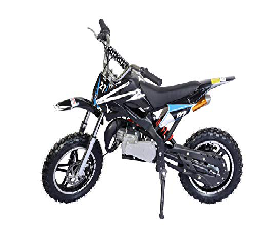

[[0. 0. 1.]]


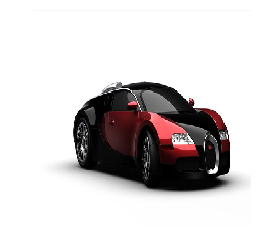

[[0. 1. 0.]]


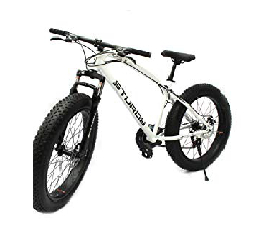

[[0. 0. 1.]]


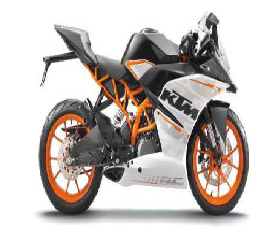

[[0. 0. 1.]]


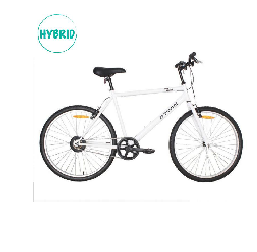

[[0. 1. 0.]]


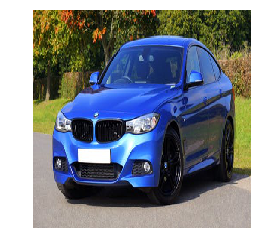

[[0. 1. 0.]]


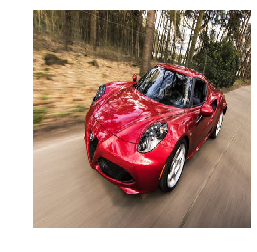

[[0.0000000e+00 1.0000000e+00 1.3186702e-13]]


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


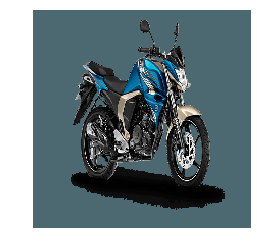

[[0.000000e+00 6.670063e-14 1.000000e+00]]


In [47]:
uploaded= files.upload()

for fn in uploaded.keys():
  # predict image
  path='/content/' + fn
  img= image.load_img(path, target_size=(214,214))
  plt.axis('off')
  plt.imshow(img)
  plt.show()
  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  
  images= np.vstack([x])
  classes= model.predict(images, batch_size=10)
  print(classes)
  

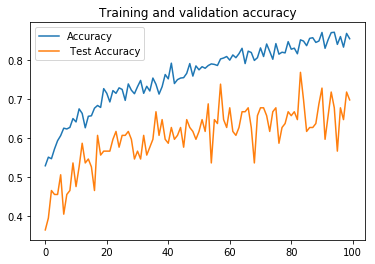

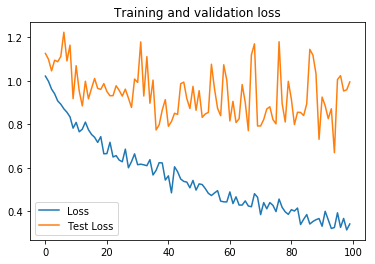

In [48]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))
plt.plot(epochs, acc, label='Accuracy')
plt.plot(epochs, val_acc, label=' Test Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, val_loss, label='Test Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth= GoogleAuth()
gauth.credentials= GoogleCredentials.get_application_default()
drive= GoogleDrive(gauth)

In [51]:
model.save('model1.h5')
model_file= drive.CreateFile({'title':'model1.h5'})
model_file.SetContentFile('model1.h5')
model_file.Upload()
drive.CreateFile({'id':model_file.get('id')})

GoogleDriveFile({'id': '1iY2vmvoi8Z6Q1r7sxLzp7N9pAo9p8mjZ'})

In [52]:
model1= "model1.h5"
converter = tf.lite.TFLiteConverter.from_keras_model_file(model1)
converted_tflite_model = converter.convert()
open("model1.tflite", "wb").write(converted_tflite_model)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.


441780